# Assignment03
# This script demonstrates the k-means algorithm
# Name : Lee Gyu Hyeong
# Student ID : 20122208
# Link to github : https://github.com/GyuHyeong/assignment03.git

# K-means algorithm

# Import packages for plotting graphs and manipulating data

In [1]:
import numpy as np
from matplotlib import pyplot as plt 

# Define a function that generates variables essential for k-means algorithm.

In [2]:
def generatePointCluster(cluster_num,point_num):#function that genarates variables 
                                                #essential for k-means algorithm
    k=cluster_num                               #k is the number of cluster
    points = np.random.rand(2,point_num)*100    #points between(0~100) 
    label=np.zeros(point_num)                   #label of ecah point
    centers=np.random.rand(2,cluster_num)*100   #centers of points of sane label
    distance=np.zeros((centers.shape[1],points.shape[1]))#distances between points
                                                         #and centers
    return k,points,label,centers,distance

# Define  some functions that are essential for k-means algorithm.

In [3]:
def initializeLabel(cluster_num,label): #randomly initialize labels
    random_seed=np.random.rand(len(label))*100 #variable that will be substituted 
                                               #to the label
    for i in range(len(label)):                   
        random_seed[i]=int(random_seed[i])
        random_seed[i]=random_seed[i]%cluster_num#randomly initialize labels
    for i in range(len(label)):                       
        label[i]=random_seed[i]                  #label is randomly initialized 
    return

def choosecolor(label_i) : #choose different color depending on diffrent label
    for i in range(100):
        if label_i==0:
            return 'red'
        elif label_i==1:
            return 'blue'
        elif label_i==2:
            return 'cyan'
        elif label_i==3:
            return 'magenta'
        elif label_i==4:
            return 'yellow'
        elif label_i==5:
            return 'black'
        else:
            return 'white'
        
def plotAll(points,label,centers):  #plot points and center points
    for i in range(points.shape[1]): #as much as the number of points
        plt.scatter(points[0,i],points[1,i],c=choosecolor(label[i]))
    for i in range(centers.shape[1]): #as much as the number of clusters
        plt.scatter(centers[0,i],centers[1,i],s=200,c=choosecolor(i),marker='^')
    plt.show()
    return

def assignLabel(points,centers,label,distance): #compute the distance center points
                                                #and points. 
                                                #And update the label of points
    for i in range(points.shape[1]):
        for j in range(centers.shape[1]):
            distance[j,i]=computeDistance(centers[:,j],points[:,i])#compute distances
    for i in range(points.shape[1]):
        for j in range(centers.shape[1]):               
            if distance[j,i]==distance[:,i].min():  #when thd distance is minimum
                label[i]=j                          #update label
    return

# Define a function that computes the center points of the points sharing same label. 

In [4]:
def computeCentroid(cluster_num,points,label):  #compute the center of points sharing 
                                                #same label
    sum=np.zeros((2,cluster_num))               #variable for the sum
    num=np.zeros(cluster_num)                   #variable for dividing sum
    for i in range(points.shape[1]):            #as much as the num of points
        sum[:,int(label[i])]=sum[:,int(label[i])]+points[:,i]#must change the type of
                                                            #label[i] to type(int)
        num[int(label[i])]=num[int(label[i])]+1  #count the number
    for i in range(cluster_num):
        sum[:,i]/=num[i]                         #sum goes to be a mean value
    return sum

# Define function that compute distance between two points. And I computed distance with this wa $d((x_1,y_1),(x_2,y_2))=(x_1-x_2)^2+(y_1-y_2)^2$

In [5]:
def computeDistance(center_point,point):    #compute the distance between two points
    dis=(center_point[0]-point[0])**2+(center_point[1]-point[1])**2
    return dis

# Define function that compute energy. And I computed energy with this way $Energy=\frac{1}{N}\sum_{i=1}^N (p_x-c_{k_x})^2+(p_y-c_{k_y})^2$

In [6]:
def computeEnergy(distance):        #compute the Energy
    energy_sum=0
    for i in range(distance.shape[1]):
        energy_sum+=distance[:,i].min() #add all of the distance between
                                        #points and corresponding center points
    return energy_sum/distance.shape[1] 

# I defined all functions necessary for k-means algorithm. Let's start to see how k-means algorithm works.




# First, I choose the number of cluster and point. And make points randomly dispersed.

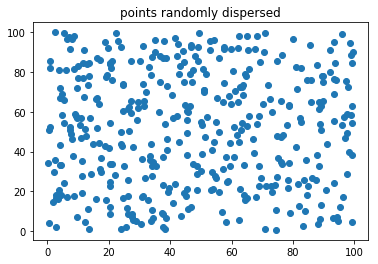

In [7]:
k,points,label,centers,distance=generatePointCluster(3,400) #generate variables
                            #for the k-mean algorithm. And the first parameter 
                            #is the num of clusters and second parameter is 
                            #num of points
plt.scatter(points[0,:],points[1,:]) #plot the points randomly dispersed
plt.title('points randomly dispersed')
plt.show()

# Initialize label and plot points. Same color means same label. And center points are triangular.

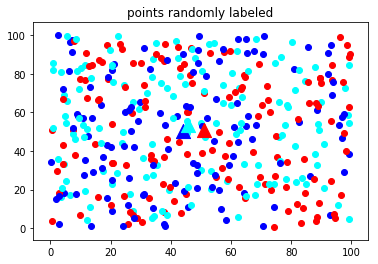

In [8]:
initializeLabel(k,label)    #randomly initialize labels

centers=computeCentroid(k,points,label) #compute the center points
plt.title('points randomly labeled')
plotAll(points,label,centers)  #plot the points and labels randomly initialized

# Then, I do a iteration that assigns new label and computes center points. And plot points after 1st iteration and 2nd iteration.

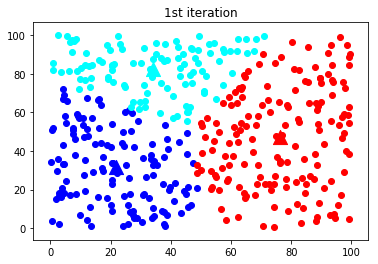

1st iteration's energy :  1456.3551509959725


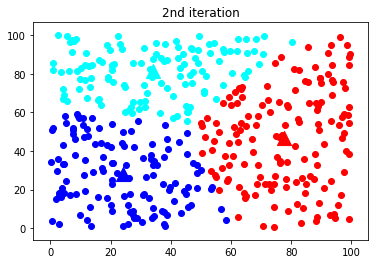

2nd iteration's energy :  636.0271134782557


In [9]:
assignLabel(points,centers,label,distance) # fisrt update the labels
centers=computeCentroid(k,points,label)    # fisrt update the center points
plt.title('1st iteration')
plotAll(points,label,centers)   #plot points and center points with new label
print("1st iteration's energy : ", computeEnergy(distance)) #show the energy

assignLabel(points,centers,label,distance) # second update the labels
centers=computeCentroid(k,points,label)    # second update the center points
plt.title('2nd iteration')
plotAll(points,label,centers)   #plot points and center points with new label
print("2nd iteration's energy : ", computeEnergy(distance)) #show the energy

# Iterate until energy does not change.

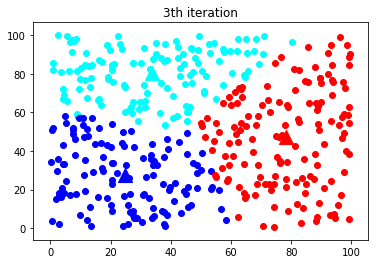

3th iteration's energy :  628.0249933046921


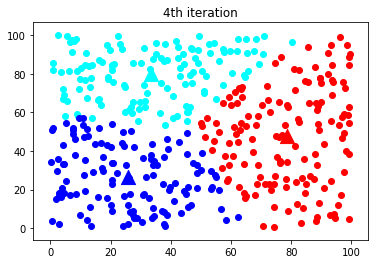

4th iteration's energy :  626.9627413683679


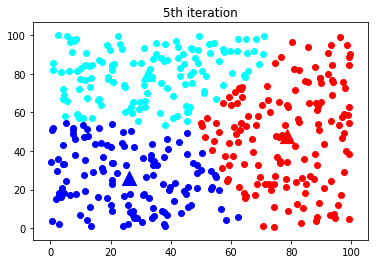

5th iteration's energy :  625.1938447223132


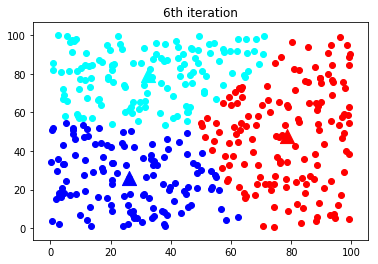

6th iteration's energy :  624.7585227626448


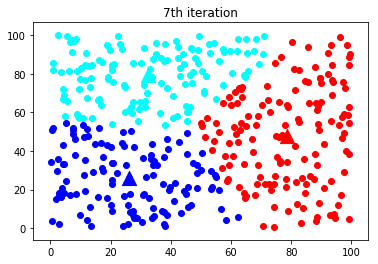

7th iteration's energy :  624.7270353778337


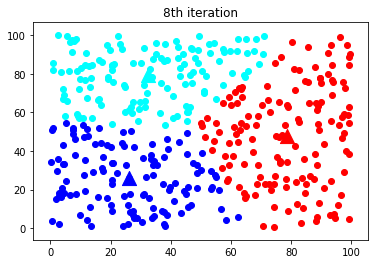

8th iteration's energy :  624.7270353778337


In [10]:
num_iteration=3                 #the num of iterations
this_E=computeEnergy(distance)  #right before energy 
                                                    
while True:                     #iterate until energy does not change                       
    this_E=computeEnergy(distance)                  
    assignLabel(points,centers,label,distance) #update the labels
    centers=computeCentroid(k,points,label)    #update the center points
    plt.title('%dth iteration'%num_iteration)
    plotAll(points,label,centers)
    print("%dth iteration's energy : "%num_iteration, computeEnergy(distance))
    num_iteration+=1                            #num_iteration increases
    if this_E==computeEnergy(distance):         #when the energy does not change
        break                                   #escape the iteration loop
    

# Energy does not change. Finally, finished the k-means algorithm. 